**Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Cleaning**

In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df["spam"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)

<Axes: xlabel='Category', ylabel='count'>

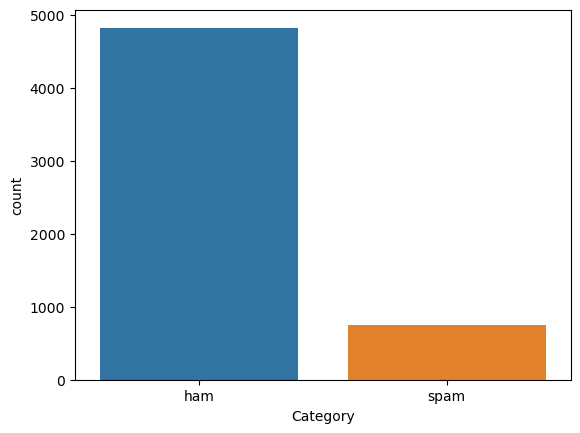

In [10]:
sns.countplot(x="Category", data=df)

In [ ]:
x=df.Message
y=df.spam

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
x_tra=vector.fit_transform(x_train)
x_tes=vector.transform(x_test)

**Model selection and training**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB()
naive.fit(x_tra,y_train)

In [ ]:
naive.score(x_tes,y_test)

In [ ]:
y_predict=naive.predict(x_tes)

In [ ]:
from sklearn.metrics import confusion_matrix
ce=confusion_matrix(y_predict,y_test)
ce

In [ ]:
sns.heatmap(ce,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
naive.predict(x_tes)

**PipeLine**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ce=Pipeline([
    ("vectoriz",CountVectorizer()),
    ("nb",MultinomialNB())
])

In [ ]:
ce.fit(x_train,y_train)

In [ ]:
ce.predict(x_test)

In [ ]:
ce.score(x_test,y_test)

**Fine Tuning**

In [ ]:
model_params={
    'svm':{
        'model': SVC(gamma='auto'),
        'params':{'kernel':['rbf','linear'],
                 'C':[1,5,10]}}}

In [ ]:
res=[]
for name,param in model_params.items():
    ce=GridSearchCV(param['model'],param['params'],cv=5,return_train_score=False)
    ce.fit(x_tra,y_train)
    res.append(
        {
            'model':name,
            'best_score':ce.best_score_,
            'best_param':ce.best_params_
        }
    )

In [ ]:
result=pd.DataFrame(res)

In [ ]:
result